# WeatherPy
----

### Analysis
* As we approach the equater at 0 degrees Latitude, the weather becomes warmer and warmer. Currently there is a trend in which the cities south of the equater are warmer than those north of it because the southern hemisphere is approaching their summer months.
* There is a slight trend where the cities north of the Tropics of Capricorn (23.4 degrees south of the equator) and the cities south of the Tropics of Cancer (23.4 degrees north of the equater) tend to be more humid than those outside of those boundaries. Although, cities in the North tend to be more humid than those in the south because some cities are approaching their wet seasons as the winter months are approaching.
* There doesn't seem to be a relationship between the latitude of a city and its cloudiness, however, cities to the north of the equator tend to be ever so slightly windier than those in the south probably because the northern cities are approaching the winter months.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# Create Data Frame of city names
cities_df = pd.DataFrame({'city':cities})
cities_df.head(20)

,city
0,hilo
1,queenstown
2,nanakuli
3,troitskoye
4,eaglesfield
5,avarua
6,bekwai
7,tuatapere
8,mataura
9,ushuaia


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Test URL to see where parameters are located
url = "http://api.openweathermap.org/data/2.5/weather?"
target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=lompoc"
response = requests.get(target_url).json()
pprint.pprint(response)

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 34.64, 'lon': -120.46},
 'dt': 1545356760,
 'id': 5367788,
 'main': {'humidity': 93,
          'pressure': 1020,
          'temp': 56.25,
          'temp_max': 59,
          'temp_min': 53.6},
 'name': 'Lompoc',
 'sys': {'country': 'US',
         'id': 4747,
         'message': 0.1338,
         'sunrise': 1545404706,
         'sunset': 1545440107,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 280, 'speed': 9.17}}


In [10]:
# Set up columns and data frame for selected cities 
columns = ['City', 'Country', 'Latitude', 'Longitude',
           'Temperature (F)','Humidity', 'Cloudiness',
           'Wind Speed (MPH)', 'Date']
selected_cities = pd.DataFrame(columns=columns)

# Set up counters for records and sets
country_set = 1
record = 1
print("Beginning Data Retrieval\n-----------------------------")

# loop through cities and pull data from OpenWeatherMaps
for index,row in cities_df.iterrows():
    target_city = row['city']
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    target_url = base_url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    try:
        selected_cities.set_value(index, 'City', city_data['name'])
        selected_cities.set_value(index, 'Country', city_data['sys']['country'])
        selected_cities.set_value(index, 'Latitude', city_data['coord']['lat'])
        selected_cities.set_value(index, 'Longitude', city_data['coord']['lon'])
        selected_cities.set_value(index, 'Temperature (F)', city_data['main']['temp'])
        selected_cities.set_value(index, 'Humidity', city_data['main']['humidity'])
        selected_cities.set_value(index, 'Cloudiness', city_data['clouds']['all'])
        selected_cities.set_value(index, 'Wind Speed (MPH)', city_data['wind']['speed'])
        selected_cities.set_value(index, 'Date', city_data['dt'])
        print(f"Processing Record {record} of Set {country_set} | {city_data['name']}")
        record += 1
    except:
        print('City not found. Skipping...')
    if record == 51:
        record = 1
        country_set += 1

print('-----------------------------\nData Retrieval Complete\n-----------------------------')

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | Queenstown
City not found. Skipping...


C:\Users\Pizza\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Pizza\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Pizza\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Pizza\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Pizza\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Pizza\Anaconda3\lib\s

Processing Record 2 of Set 1 | Troitskoye
Processing Record 3 of Set 1 | Eaglesfield
Processing Record 4 of Set 1 | Avarua
Processing Record 5 of Set 1 | Bekwai
Processing Record 6 of Set 1 | Tuatapere
Processing Record 7 of Set 1 | Mataura
Processing Record 8 of Set 1 | Ushuaia
City not found. Skipping...
City not found. Skipping...
Processing Record 9 of Set 1 | Puerto Ayora
Processing Record 10 of Set 1 | Padang
Processing Record 11 of Set 1 | Port Hedland
City not found. Skipping...
Processing Record 12 of Set 1 | New Norfolk
Processing Record 13 of Set 1 | Oranjestad
City not found. Skipping...
Processing Record 14 of Set 1 | Vaini
Processing Record 15 of Set 1 | Kampot
City not found. Skipping...
Processing Record 16 of Set 1 | Zeya
Processing Record 17 of Set 1 | Punta Arenas
Processing Record 18 of Set 1 | Busselton
Processing Record 19 of Set 1 | Kapaa
Processing Record 20 of Set 1 | Hamilton
City not found. Skipping...
Processing Record 21 of Set 1 | Irbit
Processing Record 2

Processing Record 21 of Set 4 | Antofagasta
Processing Record 22 of Set 4 | Diego de Almagro
Processing Record 23 of Set 4 | Walvis Bay
Processing Record 24 of Set 4 | Rapid Valley
Processing Record 25 of Set 4 | Grand Gaube
Processing Record 26 of Set 4 | Bagaces
Processing Record 27 of Set 4 | Lorengau
Processing Record 28 of Set 4 | Mahebourg
City not found. Skipping...
Processing Record 29 of Set 4 | Nagato
City not found. Skipping...
Processing Record 30 of Set 4 | Wawa
Processing Record 31 of Set 4 | Bandarbeyla
City not found. Skipping...
Processing Record 32 of Set 4 | Thessalon
Processing Record 33 of Set 4 | Vostok
Processing Record 34 of Set 4 | Vardo
Processing Record 35 of Set 4 | Qaanaaq
Processing Record 36 of Set 4 | Mount Isa
Processing Record 37 of Set 4 | Fortuna
Processing Record 38 of Set 4 | Ponta Pora
Processing Record 39 of Set 4 | Wuwei
Processing Record 40 of Set 4 | Norwich
Processing Record 41 of Set 4 | Mount Gambier
Processing Record 42 of Set 4 | Airai
Pr

Processing Record 50 of Set 7 | Kaeo
City not found. Skipping...
Processing Record 1 of Set 8 | Port Lincoln
City not found. Skipping...
City not found. Skipping...
Processing Record 2 of Set 8 | Guarapari
Processing Record 3 of Set 8 | Coquimbo
Processing Record 4 of Set 8 | Lavrentiya
Processing Record 5 of Set 8 | Lulea
Processing Record 6 of Set 8 | Lakes Entrance
Processing Record 7 of Set 8 | Adrar
Processing Record 8 of Set 8 | Kumo
Processing Record 9 of Set 8 | Hokitika
Processing Record 10 of Set 8 | Nome
Processing Record 11 of Set 8 | Sulangan
City not found. Skipping...
City not found. Skipping...
Processing Record 12 of Set 8 | Broome
Processing Record 13 of Set 8 | Creston
Processing Record 14 of Set 8 | Aklavik
Processing Record 15 of Set 8 | Boulder
Processing Record 16 of Set 8 | Alexandria
Processing Record 17 of Set 8 | Naze
Processing Record 18 of Set 8 | Ranot
Processing Record 19 of Set 8 | Luena
Processing Record 20 of Set 8 | Tura
Processing Record 21 of Set 8 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
# Make sure at least 500 cities analyzed 
selected_cities.count()

City                526
Country             526
Latitude            526
Longitude           526
Temperature (F)     526
Humidity            526
Cloudiness          526
Wind Speed (MPH)    526
Date                526
dtype: int64

In [13]:
# Export to .csv file
selected_cities.to_csv(output_data_file)

In [49]:
# Show first few rows of Data Frame
selected_cities.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity,Cloudiness,Wind Speed (MPH),Date
0,Longyearbyen,NO,78.22,15.63,37.4,93,75,32.21,1545191400
1,Mount Gambier,AU,-37.83,140.78,69.8,77,90,5.82,1545192000
2,Hirara,JP,24.8,125.28,73.4,49,40,9.17,1545192000
3,Arraial do Cabo,BR,-22.97,-42.02,76.05,94,0,7.09,1545194105
4,Seoul,KR,37.57,126.98,45.97,33,0,3.36,1545192000


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

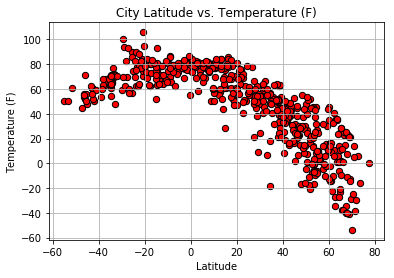

In [14]:
plt.scatter(selected_cities['Latitude'], selected_cities['Temperature (F)'], s=40, color = 'red', edgecolors = 'black')
plt.title('City Latitude vs. Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()

# Save figure
plt.savefig('./Images/LatitudeVsTemp.png')

#### Latitude vs. Humidity Plot

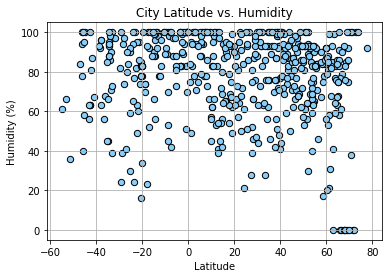

In [16]:
plt.scatter(selected_cities['Latitude'], selected_cities['Humidity'], s=40, color = 'lightskyblue', edgecolors = 'black')
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save figure
plt.savefig('./Images/LatitudeVsHumid.png')

#### Latitude vs. Cloudiness Plot

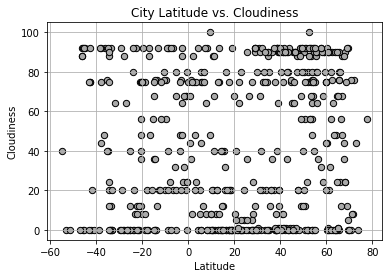

In [17]:
plt.scatter(selected_cities['Latitude'], selected_cities['Cloudiness'], s=40, color = 'darkgrey', edgecolors = 'black')
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

# Save figure
plt.savefig('./Images/LatitudeVsCloud.png')

#### Latitude vs. Wind Speed Plot

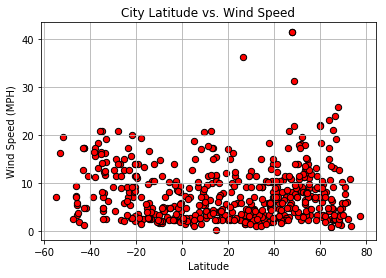

In [18]:
plt.scatter(selected_cities['Latitude'], selected_cities['Wind Speed (MPH)'], s=40, color = 'red', edgecolors = 'black')
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.grid()

# Save figure
plt.savefig('./Images/LatitudeVsWind.png')